# SMU BOSS Bid Price Analytics

### Import necessary libraries

In [95]:
import pandas as pd
from adjustText import adjust_text
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import warnings
from sklearn.exceptions import DataConversionWarning


### Data Preprocessing

In [96]:
data = pd.read_excel("data/merged_file.xls")
print(f"Unfiltered Number of rows: {data.shape[0]}")

# Handling missing data: Remove rows with "Median Bid" equal to 0 or empty "Instructor" column
filtered_data = data.drop(data[(data["Median Bid"] == 0) | (data["Instructor"].fillna("") == "") | (data["Session"] != "Regular Academic Session")].index)
filtered_data["round_successful_bids"] = filtered_data["Before Process Vacancy"] - filtered_data["After Process Vacancy"]

# Delete unnecessary columns
cols_to_delete = ["D.I.C.E"]
filtered_data.drop(columns=cols_to_delete, inplace=True)
print(filtered_data.columns)
filtered_data.head()

Unfiltered Number of rows: 186543
Index(['Term', 'Session', 'Bidding Window', 'Course Code', 'Description',
       'Section', 'Vacancy', 'Opening Vacancy', 'Before Process Vacancy',
       'After Process Vacancy', 'Enrolled Students', 'Median Bid', 'Min Bid',
       'Instructor', 'School/Department', 'round_successful_bids'],
      dtype='object')


,Term,Session,Bidding Window,Course Code,Description,Section,Vacancy,Opening Vacancy,Before Process Vacancy,After Process Vacancy,Enrolled Students,Median Bid,Min Bid,Instructor,School/Department,round_successful_bids
7,2022-23 Term 1,Regular Academic Session,Round 2A Window 3,ACCT101,Financial Accounting,G3,45.0,45.0,2.0,1.0,44.0,10.00,10.0,YIN WANG,SOA,1.0
77,2022-23 Term 1,Regular Academic Session,Round 2A Window 3,ACCT407,Corporate Financial Management,G1,45.0,45.0,6.0,5.0,40.0,10.00,10.0,GURDIP SINGH,SOA,1.0
93,2022-23 Term 1,Regular Academic Session,Round 2A Window 3,COMM120,Intercultural Communication,G2,45.0,45.0,9.0,8.0,37.0,10.00,10.0,ONG SIOW HENG,LKCSOB,1.0
95,2022-23 Term 1,Regular Academic Session,Round 2A Window 3,COMM120,Intercultural Communication,G4,45.0,45.0,1.0,0.0,45.0,20.00,20.0,SHYAMALA DEENATHAYALAN,LKCSOB,1.0
106,2022-23 Term 1,Regular Academic Session,Round 2A Window 3,COR-ACM2624,"Art History: Modern, Postmodern, and Contemporary",G1,45.0,45.0,10.0,8.0,37.0,10.93,10.0,DAVID OCON,SOSS,2.0


## Filter Dataframe by Course Code

In [97]:
course_code = "COR-STAT1202"

course_data = filtered_data[filtered_data["Course Code"] == course_code]
print(f"Instructor Data Shape: {course_data.shape}")
course_data.head()

Instructor Data Shape: (1204, 16)


,Term,Session,Bidding Window,Course Code,Description,Section,Vacancy,Opening Vacancy,Before Process Vacancy,After Process Vacancy,Enrolled Students,Median Bid,Min Bid,Instructor,School/Department,round_successful_bids
184,2022-23 Term 1,Regular Academic Session,Round 2A Window 3,COR-STAT1202,Introductory Statistics,G1,45.0,45.0,1.0,0.0,45.0,11.02,11.02,WU ZHENGXIAO,SOE,1.0
1263,2022-23 Term 1,Regular Academic Session,Round 2A Window 2,COR-STAT1202,Introductory Statistics,G7,45.0,45.0,1.0,0.0,45.0,10.00,10.00,KWONG KOON SHING,SOE,1.0
3362,2022-23 Term 1,Regular Academic Session,Round 2 Window 3,COR-STAT1202,Introductory Statistics(SMU-X),G13,45.0,45.0,4.0,3.0,42.0,12.50,12.50,ROSIE CHING,SOE,1.0
3364,2022-23 Term 1,Regular Academic Session,Round 2 Window 3,COR-STAT1202,Introductory Statistics,G15,45.0,45.0,1.0,0.0,45.0,30.45,30.45,DANIEL SOH,SOE,1.0
4417,2022-23 Term 1,Regular Academic Session,Round 2 Window 2,COR-STAT1202,Introductory Statistics(SMU-X),G11,45.0,45.0,8.0,7.0,38.0,17.00,17.00,ROSIE CHING,SOE,1.0


### Explore Bid Price for the specified course code

In [98]:
min_median_value = course_data["Median Bid"].min()
max_median_value = course_data["Median Bid"].max()
median_median_value = round(course_data["Median Bid"].median(), 2)
mean_median_value = round(course_data["Median Bid"].mean(), 2)


print(f"The min, max, median and mean values for ALL of {course_code}'s median bid prices are {min_median_value, max_median_value, median_median_value, mean_median_value} respectively.")

The min, max, median and mean values for ALL of COR-STAT1202's median bid prices are (10.0, 100.0, 30.0, 31.62) respectively.


### Which Instructors teach the specified course?

In [99]:
unique_instructors = course_data["Instructor"].unique()
print(f"Instructors that teach {course_code}: {unique_instructors}")

Instructors that teach COR-STAT1202: [' WU ZHENGXIAO' ' KWONG KOON SHING' ' ROSIE CHING' ' DANIEL SOH'
 ' ZHANG YAJIE' ' RAYMOND TEO' ' LIU SHEW FAN' ' YEO KENG LEONG'
 ' GAN CHUI GOH' ' GOH JING RONG' ' DEBANJALI ROY' ' DENIS LEUNG']


## Filter dataframe by Instructor

In [100]:
instructor_name = "YEO KENG LEONG"
# Remove leading and trailing whitespace from instructor names column
# course_data.loc[:, "Instructor"] = course_data["Instructor"].str.strip()

instructor_course_data = course_data[course_data["Instructor"].str.strip() == instructor_name]
print(f"Instructor Course Data Shape: {instructor_course_data.shape}")
instructor_course_data.head()

Instructor Course Data Shape: (65, 16)


,Term,Session,Bidding Window,Course Code,Description,Section,Vacancy,Opening Vacancy,Before Process Vacancy,After Process Vacancy,Enrolled Students,Median Bid,Min Bid,Instructor,School/Department,round_successful_bids
7594,2022-23 Term 1,Regular Academic Session,Round 1B Window 1,COR-STAT1202,Introductory Statistics,G22,45.0,15.0,6.0,5.0,10.0,15.07,15.07,YEO KENG LEONG,SOE,1.0
9720,2022-23 Term 1,Regular Academic Session,Round 1A Window 1,COR-STAT1202,Introductory Statistics,G22,45.0,15.0,6.0,5.0,10.0,24.92,24.92,YEO KENG LEONG,SOE,1.0
10797,2022-23 Term 1,Regular Academic Session,Round 1 Window 2,COR-STAT1202,Introductory Statistics,G22,45.0,15.0,8.0,5.0,10.0,31.89,23.00,YEO KENG LEONG,SOE,3.0
11874,2022-23 Term 1,Regular Academic Session,Round 1 Window 1,COR-STAT1202,Introductory Statistics,G22,45.0,10.0,10.0,3.0,7.0,28.88,18.56,YEO KENG LEONG,SOE,7.0
15051,2022-23 Term 1,Regular Academic Session,Incoming Freshmen Rnd 1 Win 2,COR-STAT1202,Introductory Statistics,G22,45.0,45.0,18.0,0.0,45.0,24.11,20.00,YEO KENG LEONG,SOE,18.0


### Explore Bid Price for the specified instructor for the specified course

In [101]:
min_course_median_value = instructor_course_data["Median Bid"].min()
max_course_median_value = instructor_course_data["Median Bid"].max()
median_course_median_value = round(instructor_course_data["Median Bid"].median(), 2)
mean_course_median_value = round(instructor_course_data["Median Bid"].mean(), 2)
print(f"The min, max, median and mean values for {instructor_name}'s {course_code} median bid prices are {min_course_median_value, max_course_median_value, median_course_median_value, mean_course_median_value} respectively.")

The min, max, median and mean values for YEO KENG LEONG's COR-STAT1202 median bid prices are (10.0, 63.29, 30.1, 33.02) respectively.


## Filter dataframe by Academic Year and/or Term

In [102]:
AY = "2023-24"
# Filter by Term (Term 1 or Term 2)?
term = "Term 2"
if term:
    AY += f" {term}"
    
instructor_course_data = instructor_course_data.sort_values(by="Bidding Window", ignore_index=True)
instructor_course_data = instructor_course_data[instructor_course_data["Term"].str.contains(AY, case=False)]
print(f"{instructor_name} taught for {course_code} in {AY} ")
instructor_course_data.head()

YEO KENG LEONG taught for COR-STAT1202 in 2023-24 Term 2 


,Term,Session,Bidding Window,Course Code,Description,Section,Vacancy,Opening Vacancy,Before Process Vacancy,After Process Vacancy,Enrolled Students,Median Bid,Min Bid,Instructor,School/Department,round_successful_bids
21,2023-24 Term 2,Regular Academic Session,Round 1 Window 1,COR-STAT1202,Introductory Statistics,G16,45.0,38.0,38.0,0.0,38.0,35.50,33.52,YEO KENG LEONG,SOE,38.0
33,2023-24 Term 2,Regular Academic Session,Round 1 Window 2,COR-STAT1202,Introductory Statistics,G16,45.0,42.0,4.0,0.0,42.0,49.35,49.00,YEO KENG LEONG,SOE,4.0
38,2023-24 Term 2,Regular Academic Session,Round 1A Window 1,COR-STAT1202,Introductory Statistics,G16,45.0,44.0,2.0,0.0,44.0,63.29,60.03,YEO KENG LEONG,SOE,2.0
55,2023-24 Term 2,Regular Academic Session,Round 1B Window 2,COR-STAT1202,Introductory Statistics,G16,45.0,45.0,1.0,0.0,45.0,45.00,45.00,YEO KENG LEONG,SOE,1.0


## Bid Price Visualisation for specified prof, course, AY and/or Term:

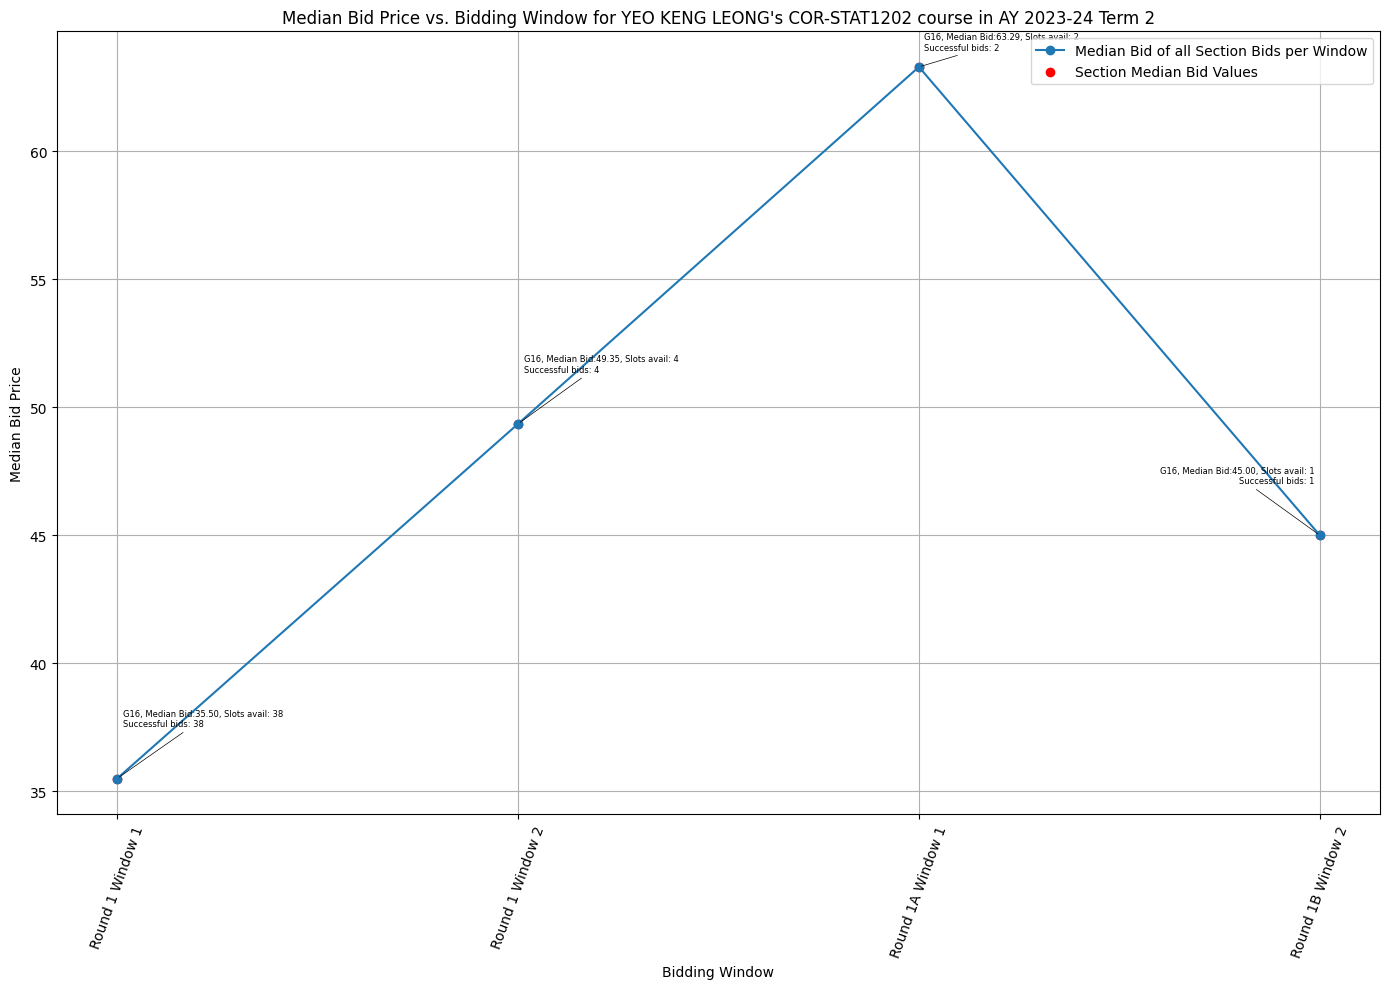

In [103]:
median_bid_by_window = instructor_course_data.groupby('Bidding Window')['Median Bid'].median().reset_index()

plt.figure(figsize=(14, 10))

# Plot the median bid values by window as a line
plt.plot(
    median_bid_by_window["Bidding Window"],
    median_bid_by_window["Median Bid"],
    marker="o",
    label='Median Bid of all Section Bids per Window'
)

# Plot all individual bid values as points
plt.scatter(
    instructor_course_data["Bidding Window"],
    instructor_course_data["Median Bid"],
    color="red",
    label="Section Median Bid Values"
)

plt.title(f"Median Bid Price vs. Bidding Window for {instructor_name}'s {course_code} course in AY {AY}")
plt.xlabel("Bidding Window")
plt.ylabel("Median Bid Price")
plt.xticks(rotation=70)
plt.grid(True)
plt.tight_layout()

max_y_values = {}

# Annotate data points with their "Section" value and adjust y-coordinate
annotations = []
for x, y, sem, section, slots_avail, round_successful_bids in zip(instructor_course_data["Bidding Window"], instructor_course_data["Median Bid"],instructor_course_data["Term"], instructor_course_data["Section"], instructor_course_data["Before Process Vacancy"], instructor_course_data["round_successful_bids"]):
    max_y = max_y_values.get(x, 0) 
    y_offset = max_y + 2
    max_y_values[x] = y_offset
    displayed_text = f"{section}, Median Bid:{y:.2f}, Slots avail: {int(slots_avail)}\nSuccessful bids: {int(round_successful_bids)}"
    if not term:
        displayed_text = f"Term {sem[-1]} {displayed_text}"
        print(displayed_text)
    annotation = plt.annotate(displayed_text, (x, y),
                            textcoords="offset points",
                            xytext=(0, y_offset),
                            ha="center", fontsize=6,
                            arrowprops=dict(arrowstyle="-", lw=0.5, color="black"))
    annotations.append(annotation)

# Use the adjust_text function to adjust the position of overlapping annotations
adjust_text(annotations, autoalign="xy", only_move={"points": "xy"})

plt.legend()
plt.show()

## Visualise each Instructor's min, mean and median bids with a Bar chart

In [104]:
# we want to create our own dataframe with the min, max mean and median median bid values
data = []

for instructor_name in unique_instructors:
    instructor_data = course_data[course_data["Instructor"] == instructor_name]
    min_value = instructor_data["Median Bid"].min()
    max_value = instructor_data["Median Bid"].max()
    median_value = round(instructor_data["Median Bid"].median(), 2)
    mean_value = round(instructor_data["Median Bid"].mean(), 2)
    data.append([instructor_name, min_value, max_value, mean_value, median_value])

# Create a DataFrame from the collected results
data_df = pd.DataFrame(data, columns=["Instructor", "Min Median Bid", "Max Median Bid", "Median Median Bid", "Mean Median Bid"])
print(data_df)
data_df.head()


           Instructor  Min Median Bid  Max Median Bid  Median Median Bid  \
0        WU ZHENGXIAO           10.00          100.00              32.34   
1    KWONG KOON SHING           10.00           43.47              25.43   
2         ROSIE CHING           10.00           80.00              18.14   
3          DANIEL SOH           12.55           62.89              30.90   
4         ZHANG YAJIE           10.40           65.20              28.98   
5         RAYMOND TEO           10.00           82.60              43.67   
6        LIU SHEW FAN           10.00           74.95              36.97   
7      YEO KENG LEONG           10.00           63.29              33.02   
8        GAN CHUI GOH           10.00           65.49              28.40   
9       GOH JING RONG           10.00           67.23              35.19   
10      DEBANJALI ROY           14.69           31.02              20.89   
11        DENIS LEUNG           11.01           57.77              29.97   

    Mean Me

,Instructor,Min Median Bid,Max Median Bid,Median Median Bid,Mean Median Bid
0,WU ZHENGXIAO,10.00,100.00,32.34,30.73
1,KWONG KOON SHING,10.00,43.47,25.43,25.13
2,ROSIE CHING,10.00,80.00,18.14,15.85
3,DANIEL SOH,12.55,62.89,30.90,29.77
4,ZHANG YAJIE,10.40,65.20,28.98,26.06


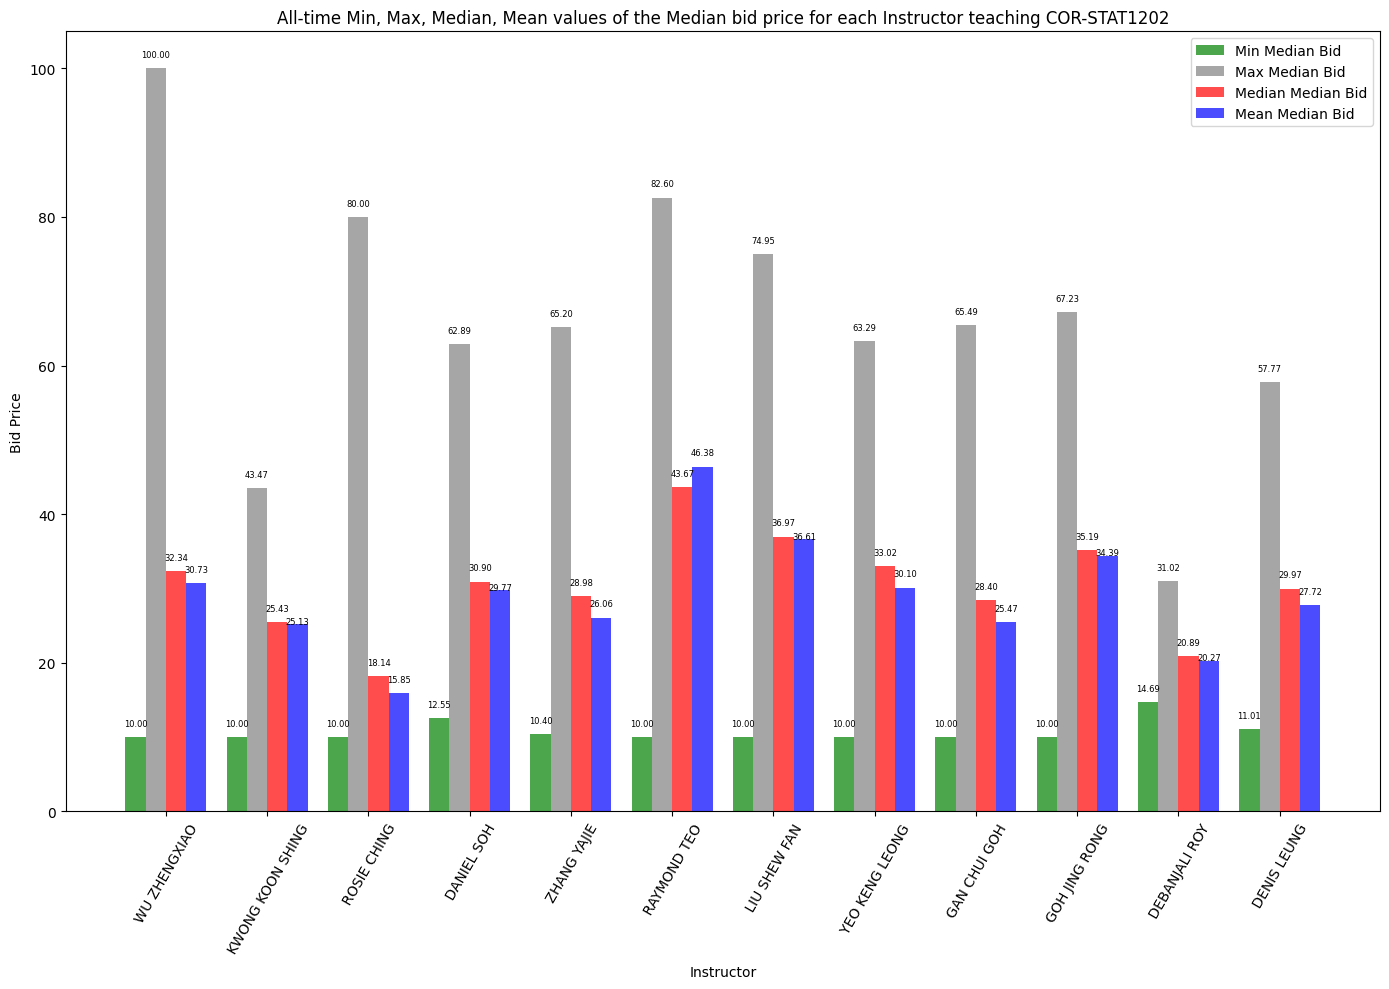

In [105]:
# choose bars you want to show:
show_min_bar = True
show_max_bar = True
show_median_bar = True
show_mean_bar = True

# Create an array of x-coords for each instructor
x = np.arange(len(data_df["Instructor"]))

group_width = 0.2 

# Create a vertical bar chart with no spaces between bars within an instructor's group
plt.figure(figsize=(14, 10))

bar_chart_annotations = []
def add_values_on_bars(bars):
    global bar_chart_annotations
    for bar in bars:
        height = bar.get_height()
        annotation = plt.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                                    xytext=(0, 6), 
                                    textcoords="offset points", 
                                    ha="center", 
                                    va="bottom", 
                                    fontsize=6)
        bar_chart_annotations.append(annotation)

if show_min_bar:
    min_bars = plt.bar(x - 1.5*group_width, data_df["Min Median Bid"], width=group_width, label="Min Median Bid", alpha=0.7, color="green")
    add_values_on_bars(min_bars)
if show_max_bar:
    max_bars = plt.bar(x - 0.5*group_width, data_df["Max Median Bid"], width=group_width, label="Max Median Bid", alpha=0.7, color="grey")
    add_values_on_bars(max_bars)
if show_median_bar:
    median_bars = plt.bar(x + 0.5*group_width, data_df["Median Median Bid"], width=group_width, label="Median Median Bid", alpha=0.7, color="red")
    add_values_on_bars(median_bars)
if show_mean_bar:
    mean_bars = plt.bar(x + 1.5 * group_width, data_df["Mean Median Bid"], width=group_width, label="Mean Median Bid", alpha=0.7, color="blue")
    add_values_on_bars(mean_bars)


adjust_text(bar_chart_annotations, autoalign="y", only_move={"points": "y"})

plt.xticks(x, data_df["Instructor"], rotation=60)
plt.xlabel("Instructor")
plt.ylabel("Bid Price")
plt.title(f"All-time Min, Max, Median, Mean values of the Median bid price for each Instructor teaching {course_code}")
plt.legend()

plt.tight_layout()
plt.show()

## Lets visualise the year over year bid prices for a specified BIDDING WINDOW AND INSTRUCTOR

In [112]:
specified_bidding_window = "Round 1 Window 1"

# re-initialise instructor_course_data dataframe as we do not want to use the instructor_course_data df above which has been filtered to the specified year
instructor_name = " YEO KENG LEONG"
print(instructor_name)
print(f"Dataframe containing the Mean median bid price across the terms for {instructor_name}:")

instructor_course_data = course_data[course_data["Instructor"] == instructor_name]
window_course_data = instructor_course_data[instructor_course_data["Bidding Window"] == specified_bidding_window]
window_course_data = window_course_data.sort_values(by="Term", ascending=True)

# Group filtered data by year and calculate the mean Median Bid for each year
yearly_instructor_course_data = window_course_data.groupby("Term")["Median Bid"].mean().reset_index()
yearly_instructor_course_data = yearly_instructor_course_data.sort_values(by="Term", ascending=True)

# renamed yearly_data df column headers to aid better understanding
yearly_instructor_course_data.rename(columns={"Median Bid": "Mean of Median Bids"}, inplace=True)
yearly_instructor_course_data.head()


 YEO KENG LEONG
Dataframe containing the Mean median bid price across the terms for  YEO KENG LEONG:


,Term,Mean of Median Bids
0,2019-20 Term 1,20.345
1,2019-20 Term 2,20.020
2,2020-21 Term 1,20.330
3,2020-21 Term 2,29.950
4,2021-22 Term 2,31.490


### Lets use a Linear Regression model to plot a best fit line and make bid price predictions for future Terms

In [113]:
# We will perform label encoding for the Terms
label_encoder = LabelEncoder()
yearly_instructor_course_data["Term"] = label_encoder.fit_transform(yearly_instructor_course_data["Term"])

X = yearly_instructor_course_data[["Term"]]
Y = yearly_instructor_course_data["Mean of Median Bids"]

reg_model = LinearRegression()
reg_model.fit(X, Y)

yearly_instructor_course_data.head()

,Term,Mean of Median Bids
0,0,20.345
1,1,20.020
2,2,20.330
3,3,29.950
4,4,31.490


In [114]:
# Find the latest term and calculate the upcoming term as the next integer value
latest_term = yearly_instructor_course_data["Term"].max()
upcoming_term = latest_term + 1

predicted_bid_upcoming_term = reg_model.predict([[upcoming_term]])

print(f"Predicted Median Bid for the upcoming Term: {predicted_bid_upcoming_term[0]:.2f}")

Predicted Median Bid for the upcoming Term: 35.22


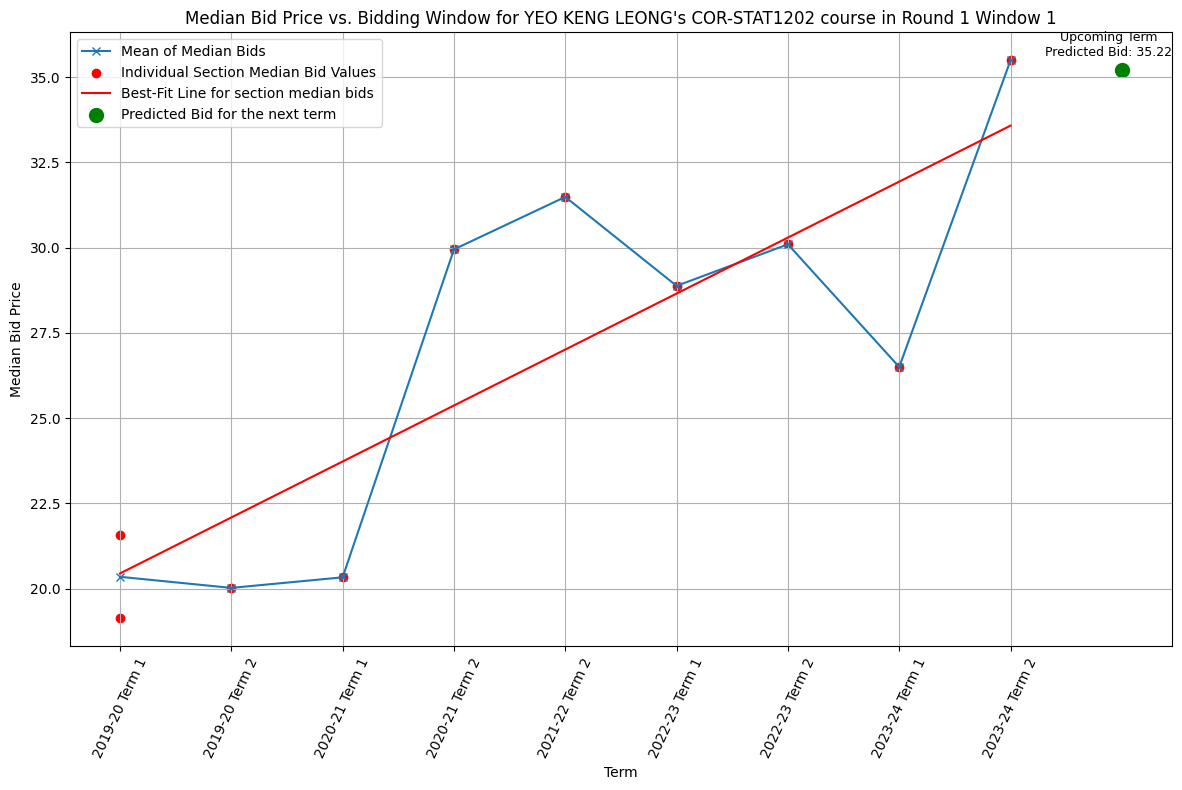

In [116]:
plt.figure(figsize=(12, 8))

plt.plot(
    yearly_instructor_course_data["Term"],
    yearly_instructor_course_data["Mean of Median Bids"],
    marker="x",
    label="Mean of Median Bids"
)

plt.scatter(
    window_course_data["Term"],
    window_course_data["Median Bid"],
    color="red",
    label="Individual Section Median Bid Values"
)

# Lets use out linear reg model to plot a best fit line
plt.plot(X, reg_model.predict(X), color="red", label="Best-Fit Line for section median bids")

plt.scatter(
    upcoming_term,
    predicted_bid_upcoming_term,
    color='green',
    marker='o',
    s=100,
    label=f'Predicted Bid for the next term'
)

# Annotate the predicted point with its value
plt.annotate(
    f"Upcoming Term\nPredicted Bid: {predicted_bid_upcoming_term[0]:.2f}",
    (upcoming_term, predicted_bid_upcoming_term),
    textcoords="offset points",
    xytext=(-9.5,10),  # Adjust the position of the text above the point
    ha="center",
    fontsize=9,
)

plt.title(f"Median Bid Price vs. Bidding Window for {instructor_name_dummy}'s {course_code} course in {specified_bidding_window}")
plt.xlabel("Term")
plt.ylabel("Median Bid Price")
plt.xticks(rotation=65)
plt.grid(True)
plt.tight_layout()

plt.legend()
plt.show()

### Lets determine the year over year increase of median bid price

In [118]:
# We can take the average of the sum of the Term over Term changes in Bid data to estimate the Term over Term increase of bid price
yearly_instructor_course_data["Term over Term Increase"] = yearly_instructor_course_data["Mean of Median Bids"].diff()
average_tot_increase = yearly_instructor_course_data["Term over Term Increase"].mean()
print(f"Estimated TOT rate of change (inflation rate) of bid price by average of the sum of the TOT changes in Bid data: {average_tot_increase:.2f} per Term")
yearly_instructor_course_data.head()

# Also, we can find gradient of the best fit line to estimate the Term over Term increase of bid price
gradient = reg_model.coef_[0]
print(f"Estimated TOT rate of change (inflation rate) of bid price by calculating gradient of the best-fit line: {gradient:.2f} per Term")

Estimated TOT rate of change (inflation rate) of bid price by average of the sum of the TOT changes in Bid data: 1.89 per Term
Estimated TOT rate of change (inflation rate) of bid price by calculating gradient of the best-fit line: 1.64 per Term


### Lets calculate the predicted bids for all profs and their estimated inflation rate for the specified window

Predicted Median Bid for  WU ZHENGXIAO in the upcoming Term: 26.86
Estimated TOT rate of change (inflation rate) of bid price for  WU ZHENGXIAO by average of the sum of the TOT changes in Bid data: -0.52 per Term
Estimated TOT rate of change (inflation rate) of bid price for  WU ZHENGXIAO by calculating gradient of the best-fit line: -0.66 per Term

Predicted Median Bid for  KWONG KOON SHING in the upcoming Term: 28.63
Estimated TOT rate of change (inflation rate) of bid price for  KWONG KOON SHING by average of the sum of the TOT changes in Bid data: -0.49 per Term
Estimated TOT rate of change (inflation rate) of bid price for  KWONG KOON SHING by calculating gradient of the best-fit line: -0.49 per Term

Predicted Median Bid for  ROSIE CHING in the upcoming Term: 9.02
Estimated TOT rate of change (inflation rate) of bid price for  ROSIE CHING by average of the sum of the TOT changes in Bid data: -1.02 per Term
Estimated TOT rate of change (inflation rate) of bid price for  ROSIE CHIN

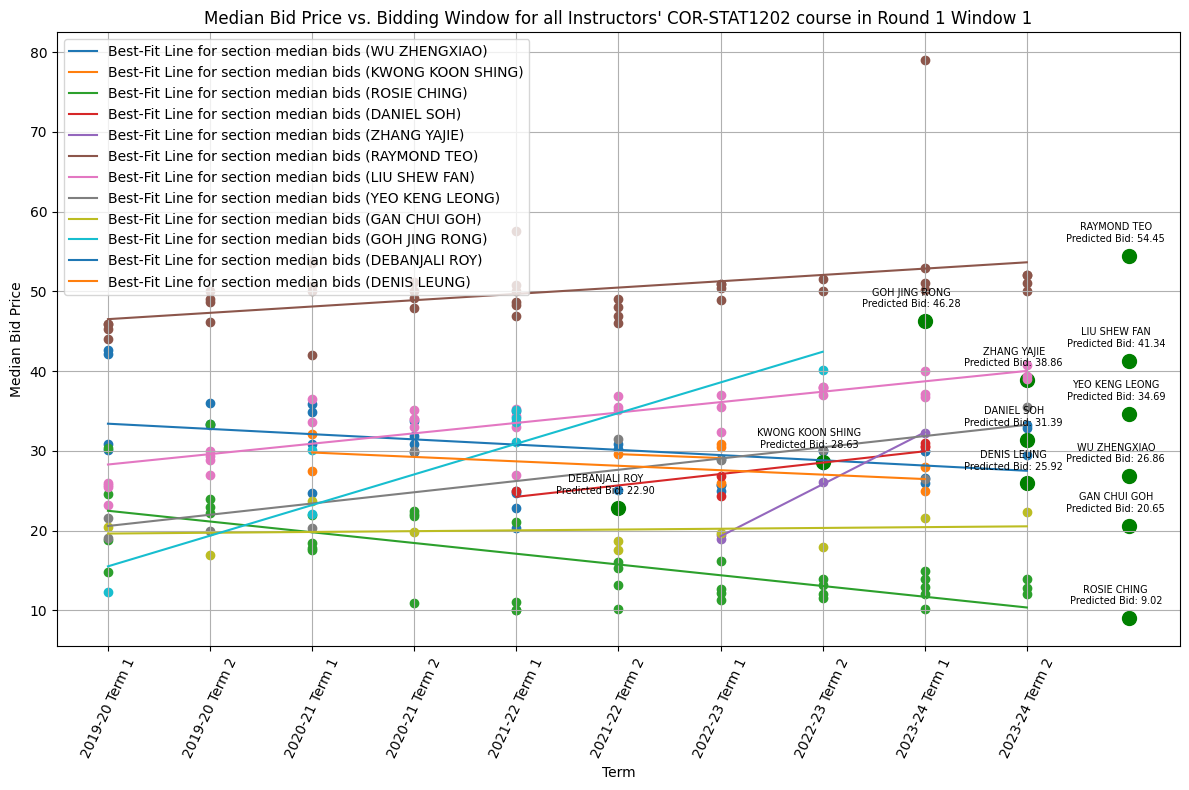

In [121]:
plt.figure(figsize=(12, 8))
label_encoder = LabelEncoder()

# We will use a hashmap like below to encode instead of a label encoder as not al instructors taught all terms
# This will need to be updated every data update
term_mapping = {
    '2019-20 Term 1': 0,
    '2019-20 Term 2': 1,
    '2020-21 Term 1': 2,
    '2020-21 Term 2': 3,
    '2021-22 Term 1': 4,
    '2021-22 Term 2': 5,
    '2022-23 Term 1': 6,
    '2022-23 Term 2': 7,
    '2023-24 Term 1': 8,
    '2023-24 Term 2': 9
}

warnings.filterwarnings("ignore", category=UserWarning)

for instructor_name in unique_instructors:
    instructor_course_data = course_data[course_data["Instructor"] == instructor_name]
    window_course_data = instructor_course_data[instructor_course_data["Bidding Window"] == specified_bidding_window]
    window_course_data = window_course_data.sort_values(by="Term", ascending=True)

    yearly_instructor_course_data = window_course_data.groupby("Term")["Median Bid"].mean().reset_index()
    yearly_instructor_course_data = yearly_instructor_course_data.sort_values(by="Term", ascending=True)

    yearly_instructor_course_data.rename(columns={"Median Bid": "Mean of Median Bids"}, inplace=True)

    
    # yearly_instructor_course_data["Term"] = label_encoder.fit_transform(yearly_instructor_course_data["Term"])

    # To encode Term, apply the mapping to your DataFrame
    yearly_instructor_course_data['Term'] = yearly_instructor_course_data["Term"].map(term_mapping)

    X = yearly_instructor_course_data[["Term"]]
    Y = yearly_instructor_course_data["Mean of Median Bids"]

    if not X.empty and not Y.empty:
        reg_model = LinearRegression()
        reg_model.fit(X, Y)

        latest_term = yearly_instructor_course_data["Term"].max()
        upcoming_term = latest_term + 1

        predicted_bid_upcoming_term = reg_model.predict([[upcoming_term]])

        print(f"Predicted Median Bid for {instructor_name} in the upcoming Term: {predicted_bid_upcoming_term[0]:.2f}")

        # plt.plot(
        #     yearly_instructor_course_data["Term"],
        #     yearly_instructor_course_data["Mean of Median Bids"],
        #     marker="x",
        #     label="Mean of Median Bids"
        # )

        plt.scatter(
            window_course_data["Term"],
            window_course_data["Median Bid"],
            label=f"_Individual Section Median Bid Values({instructor_name})"
            # underscore such that teh predicted points do not show up in legend, preventing overcrowding
        )


        plt.plot(X, reg_model.predict(X), label=f"Best-Fit Line for section median bids ({instructor_name.strip()})")

        plt.scatter(
            upcoming_term,
            predicted_bid_upcoming_term,
            color="green",
            marker="o",
            s=100,
            label=f"_Predicted Bid for the next term"
        )

        plt.annotate(
            f"{instructor_name.strip()}\nPredicted Bid: {predicted_bid_upcoming_term[0]:.2f}",
            (upcoming_term, predicted_bid_upcoming_term),
            textcoords="offset points",
            xytext=(-9.5,10),
            ha="center",
            fontsize=7,
        )

        yearly_instructor_course_data["Term over Term Increase"] = yearly_instructor_course_data["Mean of Median Bids"].diff()
        average_tot_increase = yearly_instructor_course_data["Term over Term Increase"].mean()
        print(f"Estimated TOT rate of change (inflation rate) of bid price for {instructor_name} by average of the sum of the TOT changes in Bid data: {average_tot_increase:.2f} per Term")
        yearly_instructor_course_data.head()

        gradient = reg_model.coef_[0]
        print(f"Estimated TOT rate of change (inflation rate) of bid price for {instructor_name} by calculating gradient of the best-fit line: {gradient:.2f} per Term\n")
    else:
        print(f"No data for {instructor_name}\n")
    
plt.legend()

plt.title(f"Median Bid Price vs. Bidding Window for all Instructors' {course_code} course in {specified_bidding_window}")
plt.xlabel("Term")
plt.ylabel("Median Bid Price")
plt.xticks(rotation=65)
plt.grid(True)
plt.tight_layout()

plt.show()